In [378]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [379]:
df = pd.read_csv("/content/Train.csv")
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [380]:
## Cleaning up the data
df.columns=["ID","DateTime","Count"]
del df["ID"]
df.head()

,DateTime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [381]:
df.DateTime = pd.to_datetime(df.DateTime,format='%d-%m-%Y %H:%M')
df.index = df.DateTime
df = df.resample('D').mean() 

In [382]:
# ## Drop last 2 rows
# df.drop(106,axis=0,inplace=True)
# df.drop(105,axis=0,inplace=True)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   762 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [384]:
# # Convert DateTime into Datetime
# df['DateTime']=pd.to_datetime(df['DateTime'])
# df.info()

In [385]:
# df.set_index('DateTime',inplace=True)
# df.head()

In [386]:
df.describe()

,Count
count,762.000000
mean,138.958115
std,135.911437
min,2.416667
25%,24.250000
50%,99.125000
75%,215.958333
max,702.333333


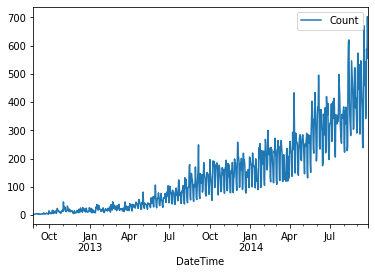

In [387]:
df.plot()

## Moving Average

#### This method removes the underlying trend in the time series also known as Detrending

In [388]:
# SMA over a period of 2 and 12 DateTime 
#min_period = min value to start calculation

df['SMA_2'] = df.Count.rolling(2, min_periods=1).mean()
df['SMA_12'] = df.Count.rolling(12, min_periods=1).mean()
df.head(20)

,Count,SMA_2,SMA_12
DateTime,,,
2012-08-25,3.166667,3.166667,3.166667
2012-08-26,3.666667,3.416667,3.416667
2012-08-27,2.583333,3.125000,3.138889
2012-08-28,2.416667,2.500000,2.958333
2012-08-29,2.500000,2.458333,2.866667
2012-08-30,3.083333,2.791667,2.902778
2012-08-31,3.250000,3.166667,2.952381
2012-09-01,4.666667,3.958333,3.166667
2012-09-02,4.916667,4.791667,3.361111


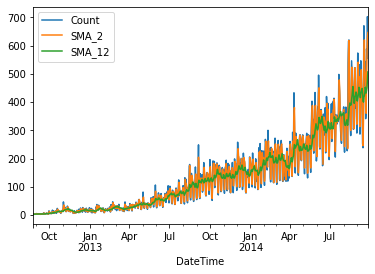

In [389]:
df.plot()

In [390]:
df['CMA']= df.Count.expanding(min_periods=1).mean()  # cummulative moving average the cumulative moving average considers all of the preceding values when calculating the average.
df.head(15)

,Count,SMA_2,SMA_12,CMA
DateTime,,,,
2012-08-25,3.166667,3.166667,3.166667,3.166667
2012-08-26,3.666667,3.416667,3.416667,3.416667
2012-08-27,2.583333,3.125000,3.138889,3.138889
2012-08-28,2.416667,2.500000,2.958333,2.958333
2012-08-29,2.500000,2.458333,2.866667,2.866667
2012-08-30,3.083333,2.791667,2.902778,2.902778
2012-08-31,3.250000,3.166667,2.952381,2.952381
2012-09-01,4.666667,3.958333,3.166667,3.166667
2012-09-02,4.916667,4.791667,3.361111,3.361111


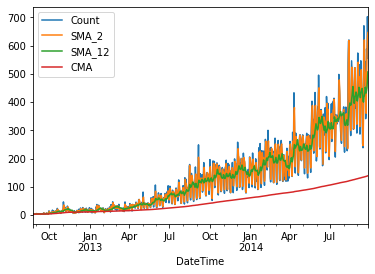

In [391]:
df.plot()

## Exponential Moving Average

In [392]:
# EMA Count
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
df['EMA_0.1'] = df.Count.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df['EMA_0.3'] = df.Count.ewm(alpha=0.3, adjust=False).mean()

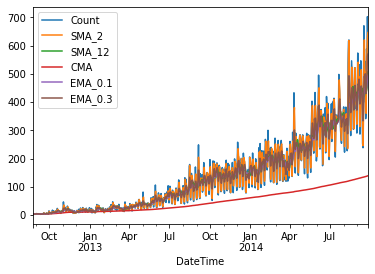

In [393]:
df.plot()

# Check for Stationarity
#### Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test. Python makes both approaches easy:

In [394]:
# Rolling Statistics or Visualization

rolmean = df.Count.rolling(window=12).mean()
rolstd = df.Count.rolling(window=12).std()

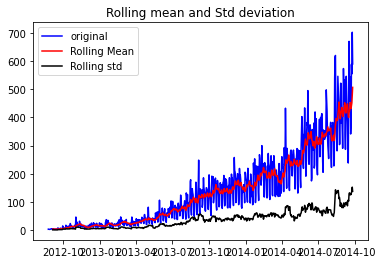

In [395]:
orig = plt.plot(df.Count,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [396]:
### Testing For Stationarity using Dickey-fuller test

from statsmodels.tsa.stattools import adfuller

In [397]:
test_result=adfuller(df['Count'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

(2.9863509590138064,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '10%': -2.5688512291811225,
  '5%': -2.8654483492874236},
 7212.068059584323)

In [398]:
#Ho: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [446]:
adfuller_test(df['Count'])

ADF Test Statistic : 2.9863509590138064
p-value : 1.0
Lags Used : 20
Number of Observations Used : 741
weak evidence against null hypothesis, indicating it is non-stationary 


# Converting Non- stationary into stationary

### Detrending
This method removes the underlying trend in the time series:

In [400]:
# Detrending
df_detrend =  (df['Count'] - df['Count'].rolling(window=21).mean())/df['Count'].rolling(window=21).std()

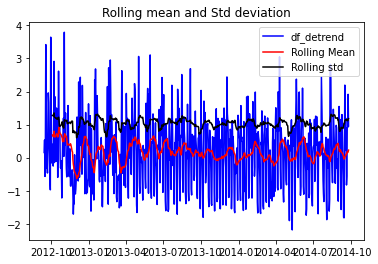

In [401]:
# Rolling Statistics or Visualization

rolmean = df_detrend.rolling(window=21).mean()
rolstd = df_detrend.rolling(window=21).std()

orig = plt.plot(df_detrend,color='blue',label='df_detrend')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [402]:
df_detrend = df_detrend.dropna()

In [448]:
#ad fuller test
adfuller_test(df_detrend.dropna())


ADF Test Statistic : -6.858601721956719
p-value : 1.6241878203855412e-09
Lags Used : 20
Number of Observations Used : 721
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


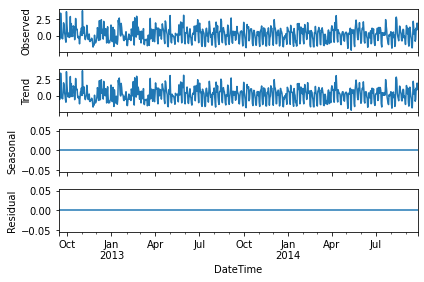

In [405]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_detrend,model='additive',freq=1)
decompose_result.plot()
plt.show()

In [413]:
n_df = df_detrend

In [425]:
converted = pd.DataFrame()

In [426]:
converted['converted_count'] = df_detrend

In [427]:
# from statsmodels.tsa.ar_model import AutoReg

In [428]:
converted['converted_count']=df['Count']-df['Count'].shift(1)
## Again test dickey fuller test
test_result=adfuller(converted['converted_count'].dropna())
test_result

(-7.869743724780802,
 5.022165724692337e-12,
 20,
 721,
 {'1%': -3.4394522667904153,
  '10%': -2.568909106765338,
  '5%': -2.8655569894909805},
 7036.700334387224)

In [429]:
converted['converted_count']=df['Count']-df['Count'].shift(21)
## Again test dickey fuller test
test_result=adfuller(converted['converted_count'].dropna())
test_result

(-9.481491805173777,
 3.8620327288466455e-16,
 20,
 720,
 {'1%': -3.439464954327953,
  '10%': -2.5689120852623457,
  '5%': -2.8655625802683473},
 7169.7144851612675)

DateTime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
                 ...    
2014-09-21    379.250000
2014-09-22    588.166667
2014-09-23    554.333333
2014-09-24    702.333333
2014-09-25    589.666667
Freq: D, Name: Count, Length: 762, dtype: float64

In [432]:
import statsmodels.api as sm


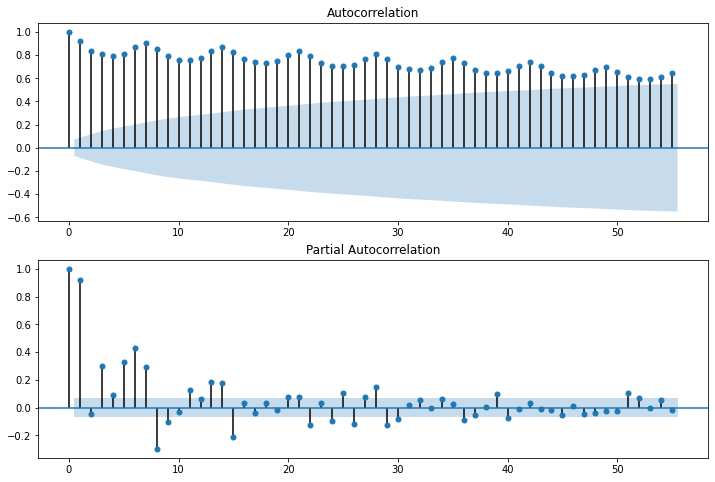

In [450]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Count'], lags=55, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Count'], lags=55, ax=ax2)

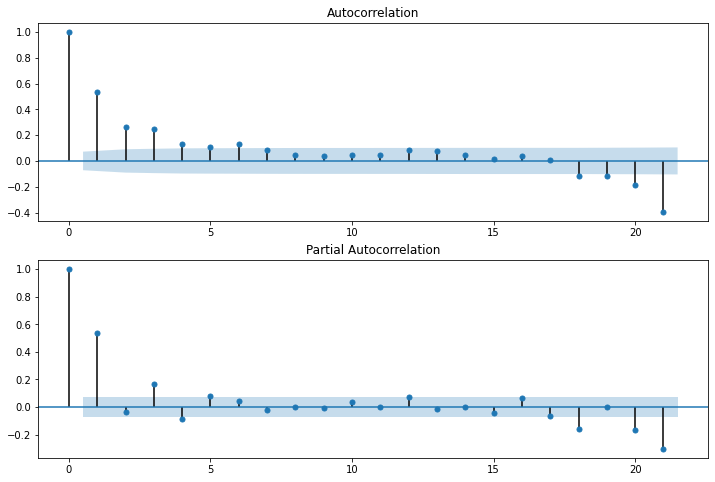

In [434]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(converted['converted_count'].dropna(), lags=21, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(converted['converted_count'].dropna(), lags=21, ax=ax2)

In [435]:
from statsmodels.tsa.arima_model import ARMA
# fit model
ARMAmodel = ARMA(df['Count'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

In [436]:
df['Count'].count()

762

In [437]:
actuals = df['Count'][749:763]
actuals

DateTime
2014-09-13    253.333333
2014-09-14    238.166667
2014-09-15    445.333333
2014-09-16    670.000000
2014-09-17    569.833333
2014-09-18    458.333333
2014-09-19    543.083333
2014-09-20    341.083333
2014-09-21    379.250000
2014-09-22    588.166667
2014-09-23    554.333333
2014-09-24    702.333333
2014-09-25    589.666667
Freq: D, Name: Count, dtype: float64

In [438]:
ypredicted = ARmodel_fit.predict(750,762)  # end point included
print(ypredicted)

2014-09-14    239.031502
2014-09-15    230.901013
2014-09-16    434.640107
2014-09-17    643.347121
2014-09-18    533.043302
2014-09-19    429.993243
2014-09-20    519.084823
2014-09-21    315.752144
2014-09-22    364.912357
2014-09-23    567.068787
2014-09-24    522.228165
2014-09-25    670.027630
2014-09-26    550.966952
Freq: D, dtype: float64


In [439]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
#print(ARmodel_fit.aic)

MAE: 23.993809


In [440]:
import itertools
i = j = range(0, 7)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(df['Count'],order=parameters)
        results = mod.fit()
        ypredicted = results.predict(750,762)  # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - MAE:348.1893212867622
ARMA(0, 1) - MAE:185.19680811759886
ARMA(1, 0) - MAE:23.241765447862583
ARMA(1, 1) - MAE:23.993809429479125


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(1, 2) - MAE:73.41028372281995
ARMA(1, 3) - MAE:70.42411559356346


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(1, 4) - MAE:85.94018480793235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: overflow encountered in square
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(1, 5) - MAE:90.0948267021097
ARMA(1, 6) - MAE:84.28812911156312
ARMA(2, 0) - MAE:23.512621313096666
ARMA(2, 1) - MAE:64.91906974103894
ARMA(2, 2) - MAE:71.18613272452762


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(2, 4) - MAE:85.64056957820587
ARMA(2, 5) - MAE:89.5869433129625
ARMA(2, 6) - MAE:76.90897615286934
ARMA(3, 0) - MAE:41.25107417522671
ARMA(3, 1) - MAE:79.14527114934191
ARMA(3, 2) - MAE:83.3511688311627
ARMA(4, 0) - MAE:41.67867406755878


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(4, 1) - MAE:81.15622076486316


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(4, 2) - MAE:82.43789364373518
ARMA(4, 3) - MAE:87.59775837360436


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:649: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


ARMA(5, 0) - MAE:64.31037666309341
ARMA(5, 1) - MAE:92.68158471295337
ARMA(6, 0) - MAE:83.385117119368


In [441]:
ARMAmodel = ARMA(df['Count'], order=(1, 0))
ARmodel_fit = ARMAmodel.fit()
ypredicted = ARmodel_fit.predict(750,762)  # end point included
print(ypredicted)
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARmodel_fit.aic)

2014-09-14    245.949290
2014-09-15    231.811256
2014-09-16    424.927481
2014-09-17    634.356822
2014-09-18    540.983651
2014-09-19    437.045796
2014-09-20    516.047888
2014-09-21    327.747916
2014-09-22    363.326046
2014-09-23    558.073583
2014-09-24    526.534891
2014-09-25    664.497246
2014-09-26    559.471850
Freq: D, dtype: float64
MAE: 23.241765
8169.4641126953575


We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [442]:
# make prediction
ypredicted = ARmodel_fit.predict(len(converted), len(converted)+12)
print(ypredicted)

DateTime
2014-09-06    506.182336
2014-09-07    326.582694
2014-09-08    276.866530
2014-09-09    406.905371
2014-09-10    518.766740
2014-09-11    460.039522
2014-09-12    405.196378
2014-09-13    359.752697
2014-09-14    245.949290
2014-09-15    231.811256
2014-09-16    424.927481
2014-09-17    634.356822
2014-09-18    540.983651
Freq: D, dtype: float64


In [445]:
import itertools
i = j = range(0, 10)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(converted['converted_count'].dropna(),order=parameters)
        results = mod.fit()
        ypredicted = results.predict(720,732)  # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - MAE:474.09019343229863
ARMA(0, 1) - MAE:469.367519207958
ARMA(0, 2) - MAE:469.5376979687883
ARMA(0, 3) - MAE:470.8456245541837
ARMA(1, 0) - MAE:472.63150834484287
ARMA(1, 1) - MAE:471.35679764015134
ARMA(1, 2) - MAE:472.365435921546
ARMA(1, 3) - MAE:473.12717413222487
ARMA(1, 4) - MAE:472.4681838168641
ARMA(1, 6) - MAE:472.1271544013567
ARMA(1, 7) - MAE:472.04966419590954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(2, 0) - MAE:472.11497174523385
ARMA(2, 1) - MAE:470.994289145691
ARMA(2, 2) - MAE:473.1966528290733
ARMA(3, 0) - MAE:473.809831738247
ARMA(3, 1) - MAE:472.9176832921521
ARMA(3, 2) - MAE:472.2689339795716
ARMA(4, 0) - MAE:472.645051040095
ARMA(4, 1) - MAE:472.5801084768437
ARMA(4, 2) - MAE:472.6579581956397
ARMA(4, 3) - MAE:472.2582895170129
ARMA(4, 6) - MAE:474.42838056354947
ARMA(5, 0) - MAE:472.71407427373947
ARMA(5, 1) - MAE:472.47274761817204
ARMA(5, 2) - MAE:472.6334963904468
ARMA(5, 3) - MAE:472.514483885574
ARMA(5, 4) - MAE:474.6571105101939


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(5, 5) - MAE:474.8393953309845


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(5, 6) - MAE:477.42185767467487
ARMA(6, 0) - MAE:472.49753354006504
ARMA(6, 1) - MAE:472.5649295957974
ARMA(6, 2) - MAE:472.5096685032482
ARMA(6, 3) - MAE:472.077904402211


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(6, 4) - MAE:470.64717098295364
ARMA(6, 5) - MAE:472.3172710678909


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(7, 0) - MAE:472.6422915802113
ARMA(7, 1) - MAE:472.524452998291
ARMA(7, 2) - MAE:472.2177724053481


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(7, 3) - MAE:470.87677006302096


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(7, 4) - MAE:473.0221880579472


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

ARMA(7, 5) - MAE:473.36824741774575


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(7, 7) - MAE:472.5283162890333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(7, 8) - MAE:476.04251701419605
ARMA(8, 0) - MAE:472.6281138018138
ARMA(8, 1) - MAE:472.43148186434814
ARMA(8, 2) - MAE:472.1964006274497


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(8, 3) - MAE:472.6627483735989


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(8, 4) - MAE:471.50641854789126


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


ARMA(8, 6) - MAE:474.8265328152412


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARMA(8, 8) - MAE:471.3401632748894
ARMA(9, 0) - MAE:472.66365586709696
ARMA(9, 1) - MAE:472.7077452956398
ARMA(9, 2) - MAE:473.19489496630587


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: inv

ARMA(9, 6) - MAE:477.0810586235174
ARMA(9, 8) - MAE:473.4539059034151


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
